# Data Cleaning, Filtering, and Plotting with Pandas and Matplotlib
This notebook consists of data cleaning, filtering, processing, and visualizations following a series of questions and prompts that can be answered by analyzing a provided dataset of businesses in New York City for the 2020 Fiscal Year

## Load libraries and read file

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

company_data = pd.read_csv('FY2020.csv')

### How many different companies are represented in the data set?

In [12]:
companies = [x for x in company_data['Company Name']]
print(len(companies))

450


### What is the total number of jobs created for businesses in Queens? 

In [25]:
equeens = company_data[company_data['Borough']== 'Queens']
equeens_jobs = equeens['Job created'].dropna()
total = equeens_jobs.sum()
print(total)

102.0


### How many different unique email domain names are there in the data set?

In [26]:
emails = [x for x in company_data['company email']]

#cleaning nan from list using pandas isnull
emails_clean = [email for email in emails if not pd.isnull(email)]

emails_clean2 = []
domains = []
for email in emails_clean:
    if '@' in email:
        emails_clean2.append(email)
    else:
        domains.append(email)

inx = []
for email in emails_clean2:
    for i in range(len(email)):
        if email[i] == '@':
            inx.append(i)

for i in range(len(emails_clean2)):
    email = emails_clean2[i]
    upper = inx[i]+1
    domain = email[upper:]
    domains.append(domain)

domains_df = pd.DataFrame(domains)
    
unique_tot = domains_df[0].unique()
print(len(unique_tot))

361


### Considering only NTAs with at least 5 listed businesses, what is the average total savings and the total jobs created for each NTA?

In [27]:
ntas = [x for x in company_data['NTA']]

nta_list = []
cnt_list = []
for nta in ntas:
    if nta not in nta_list:
        nta_list.append(nta)

for nta in nta_list:
    cnt = 0
    for nta2 in ntas:
        if nta == nta2:
            cnt = cnt + 1
    cnt_list.append(cnt)

nta_5 = []
cnt_new = []
for i in range(len(nta_list)):
    if cnt_list[i] >= 5:
        nta_5.append(nta_list[i])
        cnt_new.append(cnt_list[i])

#filter data frame based on nta_5
nta_df = energydata[energydata['NTA'].isin(nta_5)]
nta_avg_sav = nta_df.groupby(['NTA'])['Total Savings'].mean()
nta_tot_jobs = nta_df.groupby(['NTA'])['Job created'].sum()
print('Average Total Savings:')
print(' ')
print(nta_avg_sav)
print(' ')
print('Total Number of Jobs:')
print(' ')
print(nta_tot_jobs)

Average Total Savings:
 
NTA
Battery Park City-Lower Manhattan                   469890.796667
Bushwick South                                       26140.455000
Carroll Gardens-Columbia Street-Red Hook             24337.390000
College Point                                        17159.372857
Crown Heights North                                   4036.298889
DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hill     59950.340000
East New York                                        48433.093333
East Williamsburg                                    13990.626364
Greenpoint                                            9753.649286
Hunters Point-Sunnyside-West Maspeth                 23931.398933
Hunts Point                                          39246.016154
Manhattanville                                        2760.888889
Maspeth                                               6658.283333
Mott Haven-Port Morris                               17843.937857
Queensbridge-Ravenswood-Long Island City       

### Create a scatter plot of jobs versus average savings using a standard scale

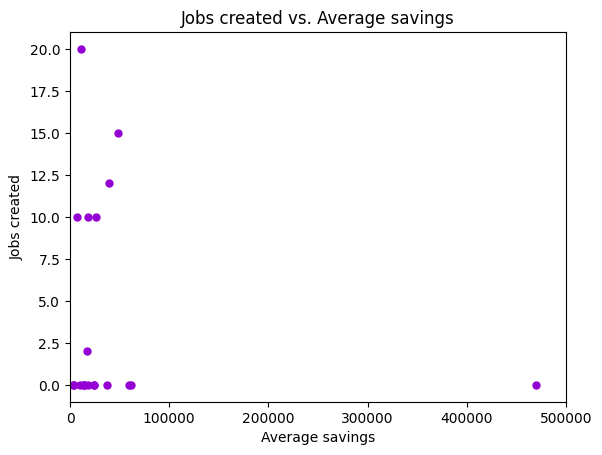

In [29]:
jobs = [x for x in nta_final['Total Jobs Created']]
savings = [x for x in nta_final['Avg Total Savings']]

plt.plot(savings,jobs, '.', color='darkviolet', markersize='10');
plt.xlabel('Average savings');
plt.ylabel('Jobs created');
plt.xlim(0, 500000);
plt.ylim(-1, 21);
plt.title('Jobs created vs. Average savings');
plt.show()

### Create a scatter plot of jobs versus average savings using a logarithmic scale

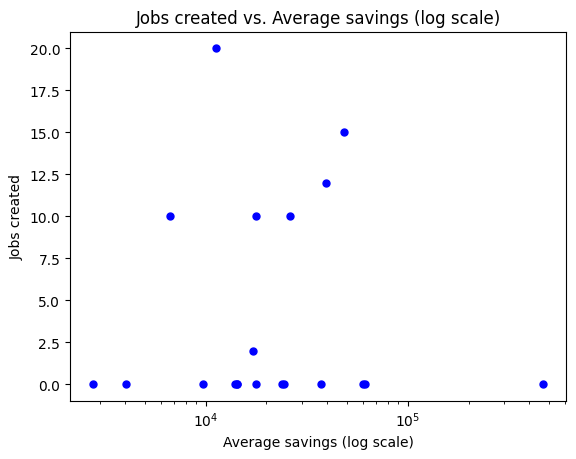

In [30]:
plt.plot(savings, jobs, '.', color='blue', markersize='10');
plt.xlabel('Average savings (log scale)');
plt.ylabel('Jobs created');
plt.title('Jobs created vs. Average savings (log scale)');
plt.xscale('log')
plt.show()

### Create a histogram of the log of the average total savings

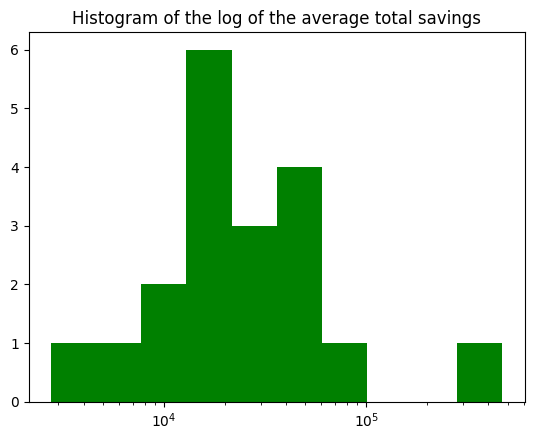

In [31]:
#source: https://stackoverflow.com/questions/47850202/plotting-a-histogram-on-a-log-scale-with-matplotlib
def plot_loghist(x, bins, c):
    hist, bins = np.histogram(x, bins=bins)
    logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
    plt.hist(x, bins=logbins, color=c)
    plt.xscale('log')

plt.figure(1)
plot_loghist(savings, 10, 'green')
plt.title('Histogram of the log of the average total savings');

### Create a line plot of the total jobs created for each month

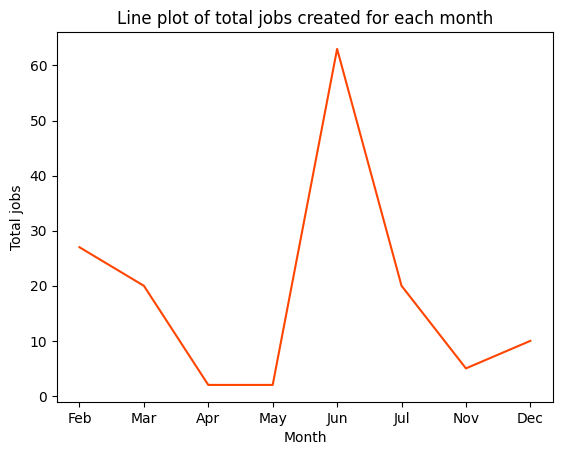

In [32]:
total_jobs = [x for x in company_data['Job created']]
date = [x for x in company_data['Effective Date']]

new_df = pd.DataFrame(total_jobs)
new_df = new_df.rename(columns={0:'Jobs'})
new_df['Date'] = date
new_df2 = new_df.dropna().reset_index()
new_df2['Date'] = pd.to_datetime(new_df2['Date'])
new_df2['Month'] = new_df2['Date'].dt.month
ser = new_df2.groupby(['Month'])['Jobs'].sum()
new_df3 = pd.DataFrame(ser).reset_index()
new_df3['Month Name'] = pd.to_datetime(new_df3['Month'], format='%m').dt.month_name().str[:3]

plt.figure(2)
plt.plot(new_df3['Month Name'], new_df3['Jobs'], color='orangered')
plt.title('Line plot of total jobs created for each month')
plt.xlabel('Month')
plt.ylabel('Total jobs');